# Homework 4
## Adam Sanchez 
### MATH 4650

<b> Problem 1

a) 

   i) $$K_{f}^{rel}(x) = \left|\frac{x}{\frac{1}{1-x}}\frac{1}{(1-x)^2}\right| = \left|\frac{x-x^2}{(1-x)^2}\right| = \left|\frac{x}{1-x}\right|$$ Now: $$\lim_{x\to\infty} \left|\frac{x}{1-x}\right| = \infty$$ So when $x \approx 1$ the relative condition number is very bad! 

ii) 

In [53]:
import math 
f = lambda x: 1/(1-x)
x = 1-(10**(-13))
print(f(x))
error = 10**(13)-f(x)
print('The error is:', error)

9996891514695.885
The error is: 3108485304.1152344
The numer of correct digits are: 3.5074511814908544


iii). There are 3 correct digits, but this expected because we know the relative condition number of $f(x)$ is bad at $x \approx 1$

In [54]:
print('The numer of correct digits are:',-math.log10(error / (10**(13))))

The numer of correct digits are: 3.5074511814908544


iv) All the digits are correct as we can see below: 

In [56]:
x = 1-(2**(-43))
print(f(x))
error = 2**(43)-f(x)
print('The error is:', error)

8796093022208.0
The error is: 0.0


b) First lets find $f'(x)$ because that looks like a headache, honestly I plugged this into to a calcultor because computers are faster at ths: 

$$ f'(x) = -\frac{d-c}{(x-2)^2}$$

Now lets plug it in: 

$$K_{f}^{rel}(x) = \left|\frac{\frac{x}{\frac{c}{1-x}+d}}{\frac{1}{1-x}+1}\frac{-(c-d)}{(x-2)^2}\right| = 
                    \left|\frac{\left(\frac{1}{1-x}+1\right)x}{\frac{c}{1-x}+d}\frac{-(c-d)}{(x-2)^2}\right| = 
                    \left|\frac{x(2-x)}{c-dx+d}\frac{-(c-d)}{(x-2)^2}\right| = 
                    \left|-\frac{(2x-x^2)(c-d)}{(c-dx+d)(x-2)^2}\right|
 $$
 
 $$K_{f}^{rel}(1) = \left|-\frac{(2-1)(c-d)}{(c-d+d)(1-2)^2}\right| = \left|\frac{c-d}{c}\right|$$

<b> Problem 2

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as interp

a) It looks like the decay of the natual spline error decays at a very fastrate (quadric rate) as n get bigger, and not-a-knot error decays at a slower rate, probably linear. 

In [41]:
error_natural=[]
error_nak = []
n=[]
mr = [10, 10**2, 10**3, 10**4, 10**5]
for i in mr:
    x = np.linspace(1.01,1.99, i)
    y = np.sin(20*x)
    s1 = interp.CubicSpline(x, y, bc_type = 'natural')
    s2 = interp.CubicSpline(x, y, bc_type = 'not-a-knot')
    error_natural.append(max(abs(s1(x)-y)))
    error_nak.append(max(abs(s2(x)-y)))
    n.append(i)

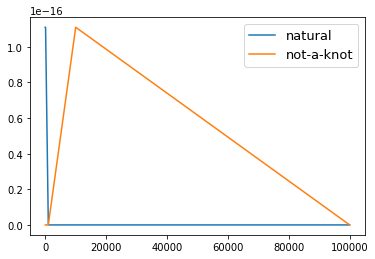

In [43]:
plt.plot(n, error_natural, n, error_nak)
plt.legend(['natural', 'not-a-knot'], fontsize = 13)

b) This sort of makes sense to me. Becasue not-a-knot requires s''' to be continious and natural only has to calculate s'' it would make sense that the error decays faster in natural

c) The error decay looks very diffent. Natural looks like it decays at a fast rate then slows to liner, while not-a-knot looks like it decays very fast. I assume this is because we are now including the endpoints.  

In [44]:
error_natural=[]
error_nak = []
n=[]
mr = [10, 10**2, 10**3, 10**4, 10**5]
for i in mr:
    x = np.linspace(1,2, i)
    y = np.sin(20*x)
    s1 = interp.CubicSpline(x, y, bc_type = 'natural')
    s2 = interp.CubicSpline(x, y, bc_type = 'not-a-knot')
    error_natural.append(max(abs(s1(x)-y)))
    error_nak.append(max(abs(s2(x)-y)))
    n.append(i)

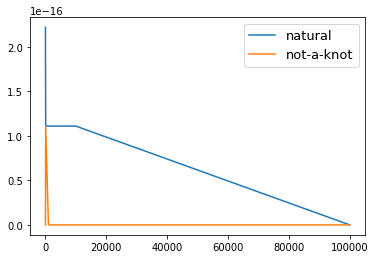

In [45]:
plt.plot(n, error_natural, n, error_nak)
plt.legend(['natural', 'not-a-knot'], fontsize = 13)

d) It looks like our error for natural is just constat at value greater than 0 and the error for not-a-knot is also constant but for a lower value. I dont know why this is. Maybe because its a piecewise so its jumping around?


In [59]:
error_natural=[]
error_nak = []
n=[]
mr = [10, 10**2, 10**3, 10**4, 10**5]
for i in mr:
    g = np.piecewise(x, [x < 1.3, x >= 1.3], [lambda x: np.sin(20*x), lambda x: np.sin(17.4-20*x)])
    s1 = interp.CubicSpline(x, g, bc_type = 'natural')
    s2 = interp.CubicSpline(x, g, bc_type = 'not-a-knot')
    error_natural.append(max(abs(s1(x)-g)))
    error_nak.append(max(abs(s2(x)-g)))
    n.append(i)

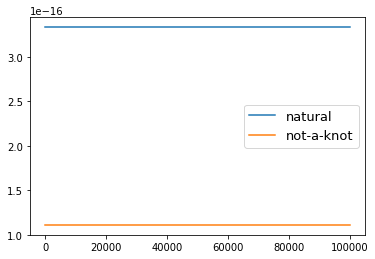

In [60]:
plt.plot(n, error_natural, n, error_nak)
plt.legend(['natural', 'not-a-knot'], fontsize = 13)